# Importing Required Libraries

In [84]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reading Datasets

In [85]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

**Short Description of Features **

- Survival    : 1 if the person survived, else 0
- PassengerId : Unique Id of a passenger.
- pclass      : Ticket class
- sex         : Sex
- Age         : Age in years
- sibsp       : # of siblings / spouses aboard the Titanic
- parch       : # of parents / children aboard the Titanic
- ticket      : Ticket number
- fare        : Passenger fare
- cabin       : Cabin number
- embarked    : Port of Embarkation

# Feature Engineering

In [86]:
train_id=train["PassengerId"]
test_id=test["PassengerId"]
# storing unique id for future refrence

## Analysing Both Train and Test Datasets

## Training dataset

In [87]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [88]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### analysing data which are present in classes

In [89]:
print(train.Pclass.value_counts(dropna=False))
print("--"*50)
print(train.Embarked.value_counts(dropna=False))
print("--"*50)
print(train.SibSp.value_counts(dropna=False))
print("--"*50)
print(train.Parch.value_counts(dropna=False))
print("--"*50)

3    491
1    216
2    184
Name: Pclass, dtype: int64
----------------------------------------------------------------------------------------------------
S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64
----------------------------------------------------------------------------------------------------
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
----------------------------------------------------------------------------------------------------
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
----------------------------------------------------------------------------------------------------


In [90]:
train.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

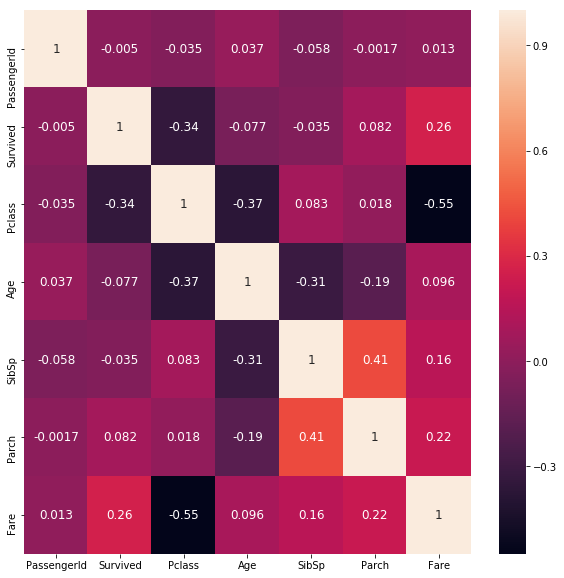

In [91]:
mat=train.corr()
fig,ax = plt.subplots(figsize = (10,10))
sns.heatmap(mat,annot = True, annot_kws={'size': 12})

- by heatmap we can easily see the dependancy of all the Featues on survival

## Testing Dataset

In [92]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [93]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [94]:
print(train.Pclass.value_counts(dropna=False))
print("--"*50)
print(train.Embarked.value_counts(dropna=False))
print("--"*50)
print(train.SibSp.value_counts(dropna=False))
print("--"*50)
print(train.Parch.value_counts(dropna=False))
print("--"*50)

3    491
1    216
2    184
Name: Pclass, dtype: int64
----------------------------------------------------------------------------------------------------
S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64
----------------------------------------------------------------------------------------------------
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
----------------------------------------------------------------------------------------------------
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
----------------------------------------------------------------------------------------------------


In [95]:
test.isnull().sum().sort_values(ascending=False)

Cabin          327
Age             86
Fare             1
Embarked         0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
PassengerId      0
dtype: int64

# Dealing with missing values

This process includes :
- As more than 50 % values of the Cabin column is  missing so we have to drop that column.
- filling the missing values of other columns.
- droping the columns which are not required in predictions .

In [96]:
del train["Cabin"]


In [97]:
train["Age"].fillna(train.Age.mean(),inplace=True)

In [98]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [99]:
train.isnull().sum().sort_values(ascending=False)

Embarked       2
Fare           0
Ticket         0
Parch          0
SibSp          0
Age            0
Sex            0
Name           0
Pclass         0
Survived       0
PassengerId    0
dtype: int64

In [100]:
#droping the 2 missing values of embarked
train.dropna(inplace=True)
# as we know  we only have 2 missing values in training data set.

## Testing Dataset

In [101]:
del test["Cabin"]

In [102]:
test["Age"].fillna(test.Age.mean(),inplace=True)

In [103]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,12.634534,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [104]:
test.isnull().sum().sort_values(ascending=False)

Fare           1
Embarked       0
Ticket         0
Parch          0
SibSp          0
Age            0
Sex            0
Name           0
Pclass         0
PassengerId    0
dtype: int64

In [105]:
# As you can not remove test data we have to fill that missing value of fare
test.fillna(test.Fare.median(),inplace=True)
test.isnull().sum().sort_values(ascending=False)

Embarked       0
Fare           0
Ticket         0
Parch          0
SibSp          0
Age            0
Sex            0
Name           0
Pclass         0
PassengerId    0
dtype: int64

Text(0.5, 1.0, 'Male')

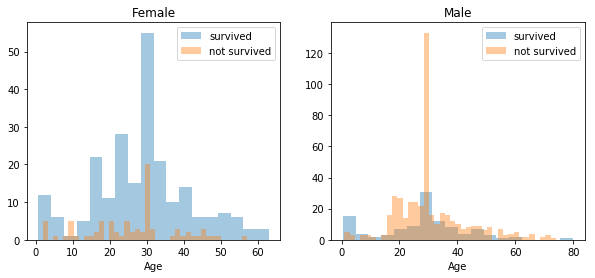

In [106]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train[train['Sex']=='female']
men = train[train['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend() 
ax.set_title('Male')

You can see that, Men have a high probability of survival when they are between 18 and 30 years old, which is also a little bit true for women but not fully. For women the survival chances are higher between 14 and 40. For men the probability of survival is very low between the age of 5 and 18, but that isn’t true for women. Another thing to note is that infants also have a little bit higher probability of survival.

## Training dataset

In [107]:
Y=train["Survived"]

In [108]:
del train["PassengerId"]
del test["PassengerId"]

In [109]:
del train["Survived"]

In [110]:
train.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [111]:
train.shape

(889, 9)

In [112]:
test.shape

(418, 9)

In [113]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [114]:
final=pd.concat([train,test],axis =0)

In [115]:
final.shape

(1307, 9)

In [116]:
final.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [117]:
def One_hot_encoding(columns):
    final_df=final
    i=0
    for fields in columns:
        df1=pd.get_dummies(final[fields],drop_first=True)#applying get_dummies and droping first column which is created
        
        final.drop([fields],axis=1,inplace=True)
        if i==0:
            final_df=df1.copy()
        else:           
            final_df=pd.concat([final_df,df1],axis=1)
        i=i+1
       
        
    final_df=pd.concat([final,final_df],axis=1)
        
    return final_df

In [118]:
columns=["Sex","Embarked","Pclass","Parch"]

In [119]:
df_final = One_hot_encoding(columns)

In [120]:
df_final.head()

,Name,Age,SibSp,Ticket,Fare,male,Q,S,2,3,1,2,3,4,5,6,9
0,"Braund, Mr. Owen Harris",22.0,1,A/5 21171,7.2500,1,0,1,0,1,0,0,0,0,0,0,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,PC 17599,71.2833,0,0,0,0,0,0,0,0,0,0,0,0
2,"Heikkinen, Miss. Laina",26.0,0,STON/O2. 3101282,7.9250,0,0,1,0,1,0,0,0,0,0,0,0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,113803,53.1000,0,0,1,0,0,0,0,0,0,0,0,0
4,"Allen, Mr. William Henry",35.0,0,373450,8.0500,1,0,1,0,1,0,0,0,0,0,0,0


In [121]:
df_final.drop("Name",axis=1,inplace=True)
df_final.drop("Ticket",axis=1,inplace=True)


In [122]:
df_final.head()

,Age,SibSp,Fare,male,Q,S,2,3,1,2,3,4,5,6,9
0,22.0,1,7.2500,1,0,1,0,1,0,0,0,0,0,0,0
1,38.0,1,71.2833,0,0,0,0,0,0,0,0,0,0,0,0
2,26.0,0,7.9250,0,0,1,0,1,0,0,0,0,0,0,0
3,35.0,1,53.1000,0,0,1,0,0,0,0,0,0,0,0,0
4,35.0,0,8.0500,1,0,1,0,1,0,0,0,0,0,0,0


## Normalising datasets

In [123]:
from sklearn import preprocessing
# Get column names first
names = df_final.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(df_final)
df_final = pd.DataFrame(scaled_df, columns=names)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


### assigning unique names to the columns

In [124]:
cols = []
count = 1
for column in df_final.columns:
    cols.append(count)
    count+=1
    continue
    
df_final.columns = cols

In [125]:
df_final.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.610722,0.480272,-0.501839,0.741900,-0.322312,0.655727,-0.518587,0.918391,-0.386673,-0.307636,-0.078477,-0.067911,-0.067911,-0.039148,-0.039148
1,0.633830,0.480272,0.736023,-1.347891,-0.322312,-1.525025,-0.518587,-1.088861,-0.386673,-0.307636,-0.078477,-0.067911,-0.067911,-0.039148,-0.039148
2,-0.299584,-0.479537,-0.488790,-1.347891,-0.322312,0.655727,-0.518587,0.918391,-0.386673,-0.307636,-0.078477,-0.067911,-0.067911,-0.039148,-0.039148
3,0.400477,0.480272,0.384512,-1.347891,-0.322312,0.655727,-0.518587,-1.088861,-0.386673,-0.307636,-0.078477,-0.067911,-0.067911,-0.039148,-0.039148
4,0.400477,-0.479537,-0.486373,0.741900,-0.322312,0.655727,-0.518587,0.918391,-0.386673,-0.307636,-0.078477,-0.067911,-0.067911,-0.039148,-0.039148


## Again spliting datasets into train and test !!

In [126]:
df_train=df_final.iloc[:889,:]
df_test=df_final.iloc[889:,:]

In [127]:
X=df_train

In [128]:
df_test.shape

(418, 15)

# Modeling

In [129]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

## Applying Xgboost

In [130]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

In [131]:
xgb = XGBClassifier()

space={"n_estimators" : [100, 500, 900, 1100, 1500],
    'max_depth': [2, 3, 5, 10, 15],
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }

def objective(space):
    clf=XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train, Y_train), ( X_test, Y_test)]
    
    clf.fit(X_train, Y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(X_test)
    accuracy = accuracy_score(Y_test, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

print("The best hyperparameters are : ","\n")
print(best_hyperparams)

xgb=XGBClassifier(colsample_bytree=0.7645721470815605, gamma= 6.138517557027179,
       max_depth=8,min_child_weight=6.0,reg_alpha=98.0,
       reg_lambda=0.1568247325319473)

In [132]:
xgb.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=100, n_jobs=0, num_parallel_tree=1,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None)

In [133]:
print("R-Squared Value for Training Set: {:.3f}".format(xgb.score(X_train,Y_train)))
print("R-Squared Value for Test Set: {:.3f}".format(xgb.score(X_test,Y_test)))

R-Squared Value for Training Set: 0.976
R-Squared Value for Test Set: 0.794


In [ ]:
predictions_01 = model_rforest.predict(df_test)

In [154]:
type(predictions_01)

numpy.ndarray

## Applying Random Foresting

In [134]:
from sklearn.ensemble import RandomForestClassifier

In [135]:
model_rforest = RandomForestClassifier()

In [136]:
model_rforest.fit(X_train,Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [137]:
print("R-Squared Value for Training Set: {:.3f}".format(model_rforest.score(X_train,Y_train)))
print("R-Squared Value for Test Set: {:.3f}".format(model_rforest.score(X_test,Y_test)))

R-Squared Value for Training Set: 0.958
R-Squared Value for Test Set: 0.825


In [144]:
predictions_02 = model_rforest.predict(df_test)

In [155]:
type(predictions_02)

numpy.ndarray

In [139]:
output_01 = pd.DataFrame({'PassengerId': test_id, 'Survived': predictions_01})
output_01.to_csv('my_submission_05.csv', index=False)
print("Your submission was successfully saved!")

NameError: name 'predictions_01' is not defined

## Applying desicion Tree

In [140]:
from sklearn.tree import DecisionTreeClassifier

In [141]:
model_dec = DecisionTreeClassifier()
model_dec.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [142]:
print("R-Squared Value for Training Set: {:.3f}".format(model_dec.score(X_train,Y_train)))
print("R-Squared Value for Test Set: {:.3f}".format(model_dec.score(X_test,Y_test)))

R-Squared Value for Training Set: 0.982
R-Squared Value for Test Set: 0.816


In [146]:
predictions_03 = model_dec.predict(df_test)

In [156]:
type(predictions_03)

numpy.ndarray

In [ ]:
output_02 = pd.DataFrame({'PassengerId': test_id, 'Survived': predictions_02})
output_02.to_csv('my_submission_06.csv', index=False)
print("Your submission was successfully saved!")